In [1]:
!pip install pygal
!pip install squarify

     |████████████████████████████████| 127 kB 8.8 MB/s 


In [33]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

import pygal as py
import squarify as sq

import matplotlib 
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 5}

matplotlib.rc('font', **font)
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

In [34]:
df=pd.read_csv("all-data.csv",engine="python",encoding="ISO-8859-1")
print("Entries:",len(df))
print(df.head(10))

Entries: 4845
    neutral According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
0   neutral  Technopolis plans to develop in stages an area...                                                                             
1  negative  The international electronic industry company ...                                                                             
2  positive  With the new production plant the company woul...                                                                             
3  positive  According to the company 's updated strategy f...                                                                             
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                             
5  positive  For the last quarter of 2010 , Componenta 's n...                                                                             
6  pos

In [35]:
#add headers
col1=df.keys()[0]
col2=df.keys()[1]
df2=pd.DataFrame([[col1, col2]], columns=list([col1,col2]), index=[4845])
df=df.append(df2, ignore_index=True).set_axis(['sentiment', 'original message'], axis=1, inplace=False)

In [36]:
df

,sentiment,original message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


Sentiment Count


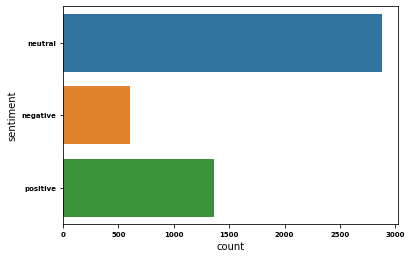

In [37]:
sns.countplot(y="sentiment",data=df)
print("Sentiment Count")

# Polarity

In [38]:
#preproces the data.
from textblob import TextBlob
def preprocess(ReviewText):
    #remove symbols and punctuations
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['message'] = preprocess(df['original message'])

df['polarity'] = df['message'].map(lambda text: TextBlob(text).sentiment.polarity)
df['len'] = df['message'].astype(str).apply(len)
df['word_count'] = df['message'].apply(lambda x: len(str(x).split()))

In [39]:
df

,sentiment,original message,message,polarity,len,word_count
0,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,0.083333,190,31
1,negative,The international electronic industry company ...,The international electronic industry company ...,0.000000,228,36
2,positive,With the new production plant the company woul...,With the new production plant the company woul...,-0.064802,206,33
3,positive,According to the company 's updated strategy f...,According to the company 's updated strategy f...,0.000000,203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0.500000,178,25
...,...,...,...,...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.000000,148,30
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 35.4 mn from EUR ...,0.000000,108,23
4843,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,0.040000,226,44
4844,negative,Sales in Finland decreased by 10.5 % in Januar...,Sales in Finland decreased by 10.5 % in Januar...,-0.200000,95,19


In [52]:
messages = df.drop_duplicates(subset=['message'])

print('Messages with High Positive Polarity (> 0.80): \n')
positive = messages.loc[df1.polarity >= 0.80, ['message']].sample(5).values 
for i in range(len(positive)):
  print(str(i+1)+". "+positive[i][0])


Messages with High Positive Polarity (< 0.80): 

1. `` This is a win for all OEMs targeting to develop WiMAX products .
2. `` I 'm happy with the outcome , '' Sneed said after the hearing .
3. `` I warmly welcome Michael Frei to Outotec .
4. Welcome !
5. All are welcome .


In [53]:
print('Messages with Neutral Polarity (= 0): \n')
neutral = messages.loc[df1.polarity == 0, ['message']].sample(5).values 
for i in range(len(neutral)):
  print(str(i+1)+". "+neutral[i][0])

Messages with Neutral Polarity (= 0): 

1. The transaction included also the transfer of the lease agreement concerning manufacturing premises and employment agreements related to these operations .
2. The Finnish daily Kauppalehti surmises that Finnish supplier Rautaruukki has raised its prices above Aker 's comfort zone .
3. According to Finnish Scanfil 's founder and chairman of the board , Jorma J. Takanen , the company has to look for growth abroad .
4. Financial details were n't disclosed .
5. Metso estimates the need for personnel reductions to amount to 25 people .


In [56]:
print('Messages with Low Negative Polarity (< -0.80): \n')
negative = messages.loc[df1.polarity <= -0.80, ['message']].sample(5).values
for i in range(len(negative)):
  print(str(i+1)+". "+negative[i][0])


Messages with Low Positive Polarity (< -0.80): 

1. Capital base and capital adequacy measurement is based on approaches under Basel II .
2. Airvana 's UMTS Home Base Station femto cell uses software-based functionality and off-the-shelf silicon to accelerate feature development and reduce product cost .
3. The company has established a 3G base station at about 17,000 feet at the foot of Mount Everest that will enable mountain climbers at the 29,035-foot summit to surf the Internet and even send videos of their exploits .
4. There has been some recovery of the base metals prices and increased demand for metals in China , however .
5. Besides , as there is no depositor preference in Finland , senior debt and deposits rank on a par , which is also taken into consideration , the agency added .


Spread of the Data


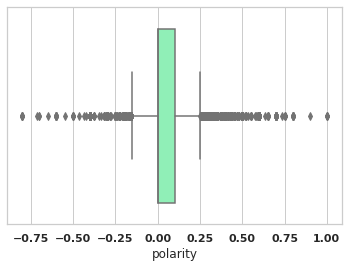

In [74]:
sns.set_theme(style="whitegrid")
sns.boxplot(x = df["polarity"],palette="rainbow")
print("Spread of Polarity")

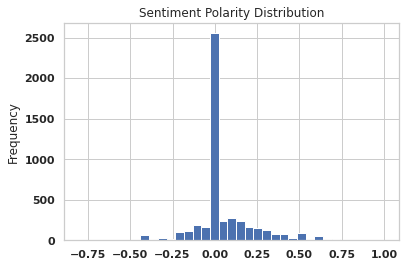

In [66]:
df['polarity'].plot(
    kind='hist',
    bins=35,
    title='Sentiment Polarity Distribution');plt.show()

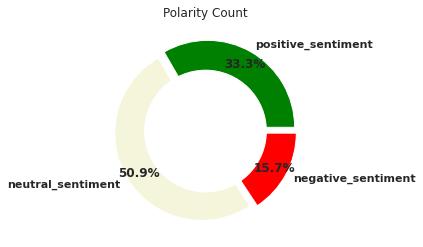

In [72]:
# Setting labels for items in Chart
p_s=df[df["polarity"]>0].count()["sentiment"]
neu_s=df[df["polarity"]==0].count()["sentiment"]
neg_s=df[df["polarity"]<0].count()["sentiment"]

sentiment = ['positive_sentiment',"neutral_sentiment","negative_sentiment"]
values = [p_s,neu_s,neg_s]
  
# colors
colors = ['green', 'beige', 'red']
# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(values, colors=colors, labels=sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Polarity Count')
  
# Displaing Chart
plt.show()

#Message Size

Spread of Message Length


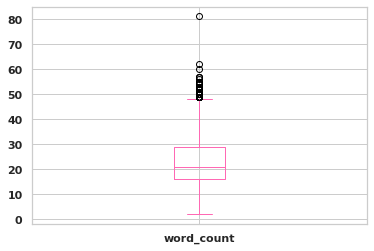

In [77]:
df.plot.box(y=["word_count"],color="hotpink")
print('Spread of Message Length')

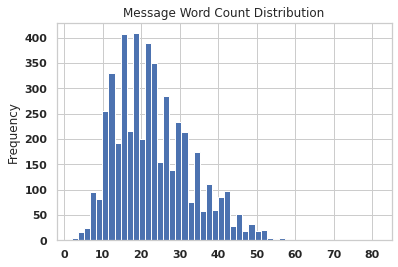

In [79]:
df['word_count'].plot(
    kind='hist',
    bins=50,
    title='Message Word Count Distribution');plt.show()

In [105]:
#Relation between unique word count and message size
fig = px.scatter(df, x="len", y="word_count", color="sentiment", 
                 marginal_x="box", marginal_y="violin")
fig.show()

#Words Frequency

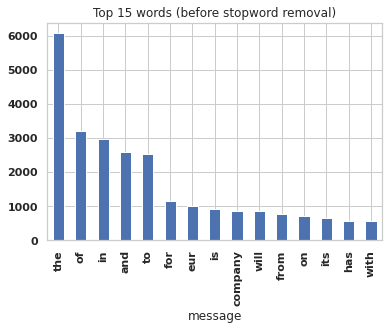

In [91]:
#Most common words in the corpus
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 15)
df1 = pd.DataFrame(common_words, columns = ['message' , 'count'])
df1.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 15 words (before stopword removal)')
print()

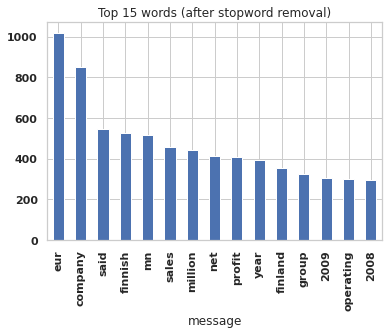

In [94]:
# Most common words after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 15)
df2 = pd.DataFrame(common_words, columns = ['message' , 'count'])
df2.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 15 words (after stopword removal)')
print()

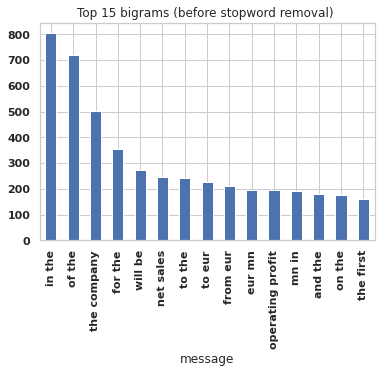

In [93]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['message'], 15)
df3 = pd.DataFrame(common_words, columns = ['message' , 'count'])
df3.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 15 bigrams (before stopword removal)')
print()

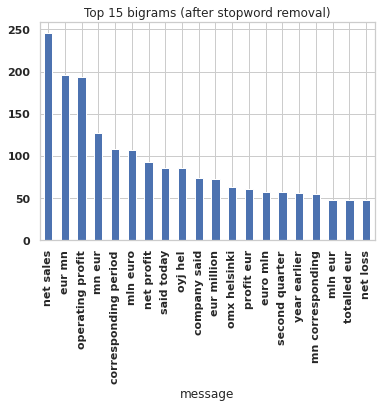

In [96]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['message'], 20)
df4 = pd.DataFrame(common_words, columns = ['message' , 'count'])
df4.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 bigrams (after stopword removal)')
print()

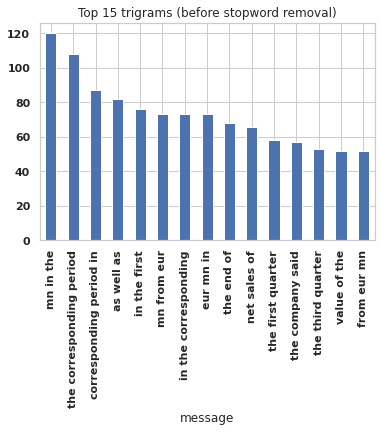

In [100]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['message'], 15)
df5 = pd.DataFrame(common_words, columns = ['message' , 'count'])
df5.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 trigrams (before stopword removal)')
print()

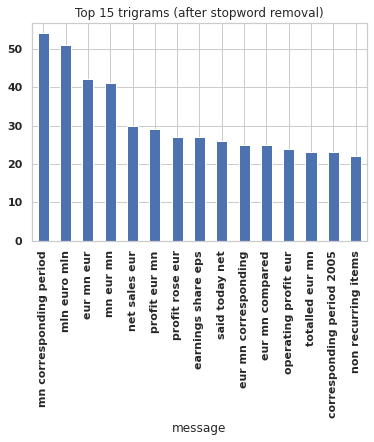

In [101]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['message'], 15)
df6 = pd.DataFrame(common_words, columns = ['message' ,'count'])
df6.groupby('message').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 trigrams (after stopword removal)')
print()

#Sentiment-based Analysis


In [102]:
#Comparing sentiment with polarity
y0 = df.loc[df['sentiment'] == 'positive']['polarity']
y1 = df.loc[df['sentiment'] == 'negative']['polarity']
y2 = df.loc[df['sentiment'] == 'neutral']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Polarity Boxplot According to Sentiment"
)

go.Figure(data=data,layout=layout)

In [104]:
#Message size with each sentiment
y0 = df.loc[df['sentiment'] == 'positive']['len']
y1 = df.loc[df['sentiment'] == 'negative']['len']
y2 = df.loc[df['sentiment'] == 'neutral']['len']


trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Length Boxplot by Sentiment"
)
go.Figure(data=data,layout=layout)

In [ ]:
xp = df.loc[df['sentiment'] == "positive", 'polarity']
xneu = df.loc[df['sentiment'] == "neutral", 'polarity']
xneg= df.loc[df['sentiment'] == "negative", 'polarity']

trace1 = go.Histogram(
    x=xp, name='positive',
    opacity=0.75
)
trace2 = go.Histogram(
    x=xneu, name = 'neutral',
    opacity=0.75
)
trace3 = go.Histogram(
    x=xneg, name = 'negative',
    opacity=0.75
)
data = [trace1, trace2,trace3]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment Polarity')
go.Figure(data=data, layout=layout)

In [118]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['len'], mode='markers', name='points',
    marker=dict(color='blue', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['len'], name='density', ncontours=50,
    colorscale='Hot', reversescale=True, showscale=False,opacity=0.4
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='blue'),
    yaxis='y2',opacity=0.4
)
trace4 = go.Histogram(
    y=df['len'], name='Length Density', marker=dict(color='blue'),
    xaxis='x2',opacity=0.4
)
data = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

go.Figure(data=data, layout=layout)


In [116]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['word_count'], mode='markers', name='points',
    marker=dict(color='brown', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['word_count'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='brown'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['word_count'], name='word count density', marker=dict(color='brown'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

go.Figure(data=data, layout=layout)


#Scatter Text Visualisation

```
# This is formatted as code
```



In [ ]:
!pip install scattertext
!pip install spacy

In [ ]:
import scattertext as st
import spacy
nlp = spacy.blank("en")
nlp.add_pipe(nlp.create_pipe('sentencizer'))
corpus = st.CorpusFromPandas(df, category_col='sentiment', text_col='message', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['oyj', 'omx', 'basware', 'ruukki', 'elcoteq', 'mln', 'capman', 'cargotec', 'teleste', 'poyry', 'aspocomp', 'scanfil', 'incap', 'cramo', 'glaston', 'tikkurila', 'outotec', 'okmetic', 'yit', 'sanoma']


In [122]:
import scattertext as st
import spacy

nlp = spacy.load("en")
nlp.add_pipe(nlp.create_pipe('sentencizer'))
corpus = st.CorpusFromPandas(df, category_col='sentiment', text_col='message', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['oyj', 'omx', 'basware', 'ruukki', 'elcoteq', 'mln', 'capman', 'teleste', 'poyry', 'cargotec', 'scanfil', 'aspocomp', 'cramo', 'incap', 'tikkurila', 'glaston', 'okmetic', 'outotec', 'yit', 'sanoma']


In [124]:
html = st.produce_scattertext_explorer(corpus, category='negative',category_name='Negative', not_category_name='Positve', width_in_pixels=1000)

In [126]:
open('./scattertext.html', 'w').write(html)

1584266